In [ ]:
# encoding=utf8

# 特征工程-线性特征变换-因子分析FA

Comparative factor analysis of growth and value funds using Fama-French 3 factor models. This analysis compares two mutual funds which are categorized as growth (T. Rowe Price Institutional Large Cap Core Growth Fund) and value (Vanguard High Dividend Yield Index Fund).


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


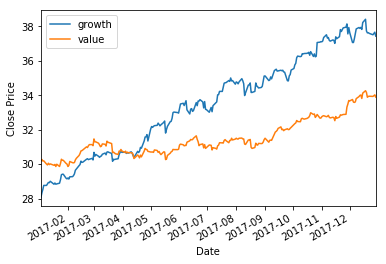

In [1]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
growth_fund = yf.download('TPLGX','2017-01-01','2018-01-01')
growth_fund.Close.plot()
value_fund = yf.download('VHDYX','2017-01-01','2018-01-01')
value_fund.Close.plot()
plt.legend(['growth','value'])
plt.ylabel('Close Price')
plt.show()

In [2]:
growth_fund = yf.download('TPLGX','2006-12-01','2018-01-01',interval='1mo')
value_fund = yf.download('VHDYX','2006-12-01','2018-01-01',interval='1mo')
growth_fund['Returns'] =  np.log(growth_fund['Adj Close'] / growth_fund['Adj Close'].shift(1)) *100
value_fund['Returns'] =  np.log(value_fund['Adj Close'] / value_fund['Adj Close'].shift(1)) *100
growth_fund = growth_fund.dropna()
value_fund = value_fund.dropna()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
fama_factors = pd.read_csv('../../DataSets/pybk020master/FF_Factors.csv',names=['Mkt-RF','SMB','HML','RF'])
growth_fund['MKT RF'] = list(fama_factors['Mkt-RF'][1:]);growth_fund['SMB'] = list(fama_factors['SMB'][1:]);
growth_fund['HML'] = list(fama_factors['HML'][1:]); growth_fund['RF'] = list(fama_factors['RF'][1:]) 
growth_fund['Excess Returns'] = [float(list(growth_fund.Returns)[i]) - float(list(growth_fund.RF)[i]) for i in range(len(growth_fund.Returns))]
value_fund['MKT RF'] = list(fama_factors['Mkt-RF'][1:]);value_fund['SMB'] = list(fama_factors['SMB'][1:]);
value_fund['HML'] = list(fama_factors['HML'][1:]); value_fund['RF'] = list(fama_factors['RF'][1:]) 
value_fund['Excess Returns'] = [float(list(value_fund.Returns)[i]) - float(list(value_fund.RF)[i]) for i in range(len(value_fund.Returns))]

In [5]:
growth_fund.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,MKT RF,SMB,HML,RF,Excess Returns
Date,,,,,,,,,,,,
2007-01-01,13.28,13.64,13.26,13.51,12.289347,0,2.165541,1.4,0.1,-0.11,0.44,1.725541
2007-02-01,13.60,13.75,13.13,13.23,12.034645,0,-2.094322,-1.96,1.32,-0.09,0.38,-2.474322
2007-03-01,13.18,13.53,12.90,13.31,12.107417,0,0.602867,0.68,-0.06,-0.22,0.43,0.172867
2007-04-01,13.38,14.23,13.38,14.08,12.807845,0,5.623963,3.49,-2.06,-1.15,0.44,5.183963
2007-05-01,14.11,14.60,14.11,14.60,13.280866,0,3.626648,3.24,0.03,-0.05,0.41,3.216648


In [6]:
value_fund.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,MKT RF,SMB,HML,RF,Excess Returns
Date,,,,,,,,,,,,
2007-01-01,20.49,20.629999,20.26,20.580000,14.847754,0,0.438244,1.4,0.1,-0.11,0.44,-0.001756
2007-02-01,20.73,20.920000,20.18,20.280001,14.631313,0,-1.468465,-1.96,1.32,-0.09,0.38,-1.848465
2007-03-01,20.24,20.670000,19.82,20.450001,14.753964,0,0.834783,0.68,-0.06,-0.22,0.43,0.404783
2007-04-01,20.48,21.400000,20.48,21.270000,15.420171,0,4.416467,3.49,-2.06,-1.15,0.44,3.976467
2007-05-01,21.35,21.940001,21.35,21.910000,15.884152,0,2.964543,3.24,0.03,-0.05,0.41,2.554543


In [7]:
y = growth_fund['Excess Returns']
X = growth_fund.ix[:,[7,8,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Excess Returns   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     492.0
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           4.67e-70
Time:                        03:34:07   Log-Likelihood:                -227.17
No. Observations:                 132   AIC:                             462.3
Df Residuals:                     128   BIC:                             473.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0848      0.122     -0.695      0.4

In [8]:
results.pvalues['const']

0.48853739587730227

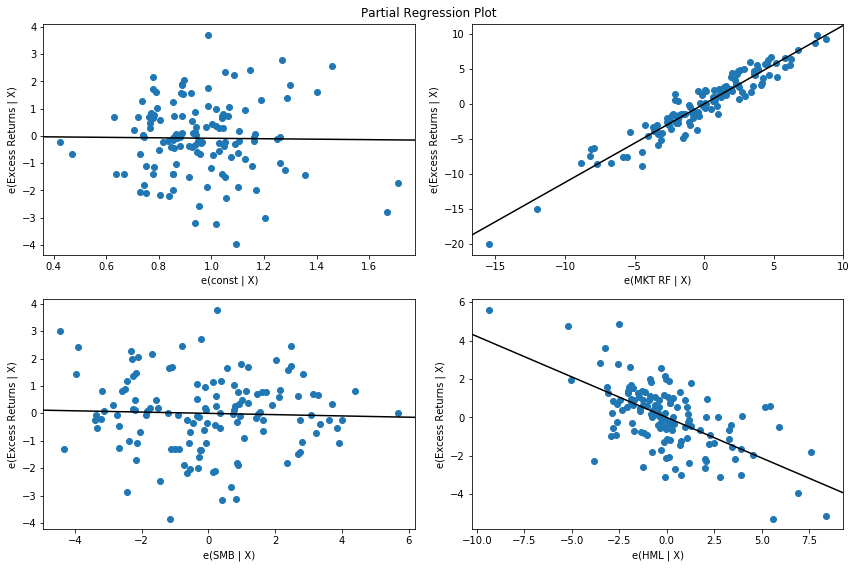

In [9]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()

In [10]:
y = value_fund['Excess Returns']
X = value_fund.ix[:,[7,8,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Excess Returns   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     547.8
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           8.13e-73
Time:                        03:34:15   Log-Likelihood:                -202.95
No. Observations:                 132   AIC:                             413.9
Df Residuals:                     128   BIC:                             425.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0191      0.102     -0.188      0.8

In [11]:
results.pvalues['const']

0.85093982973714644

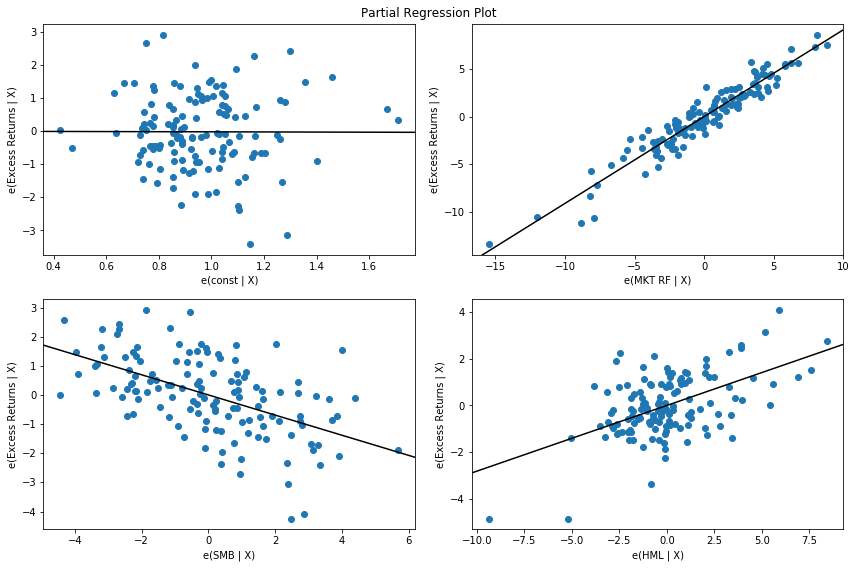

In [11]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()